# Лабораторная работа No3. Выделение контуров на изображении
## 3. Выделение контуров с помощью оператора Шарра. 

В качестве входных данных берётся цветное  или полутоновое изображение.


In [1]:
from PIL import Image, ImageOps
import numpy as np
from matplotlib.pyplot import imshow
import ipywidgets as widgets

Цветное изображение сводится к полутоновому. 

In [2]:
def ImgToGrayscale(image):
    image = image.convert('RGB')
    width = image.size[0] 
    height = image.size[1]  
    pixels = image.load() 
    new_pixels = np.zeros((height, width), np.float)
    for x in range(width):
        for y in range(height):
            tmp = pixels[x, y]
            r, g, b =  pixels[x, y][:3]
            new_pixels[y,x] = (r + g + b) / 3
    Image.fromarray(np.uint8(new_pixels), 'L').show()
    #imshow(np.asarray(np.uint8(new_pixels)))
    return Image.fromarray(np.uint8(new_pixels) , 'L') 

In [3]:
def scharrOperator(image):
    w = image.size[0]  
    h = image.size[1]  
    pixels = np.array(image, dtype=np.float) 
    horizontal = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])  
    vertical = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]])
    r=1
    newgradientImage = np.zeros((h, w))
    for i in range(r, h - r):
        for j in range(r, w - r):
            horizontalGrad = (horizontal[0, 0] * pixels[i - 1, j - 1]) + \
                             (horizontal[0, 2] * pixels[i - 1, j + 1]) + \
                             (horizontal[1, 0] * pixels[i, j - 1]) + \
                             (horizontal[1, 2] * pixels[i, j + 1]) + \
                             (horizontal[2, 0] * pixels[i + 1, j - 1]) + \
                             (horizontal[2, 2] * pixels[i + 1, j + 1])
            verticalGrad = (vertical[0, 0] * pixels[i - 1, j - 1]) + \
                           (vertical[0, 1] * pixels[i - 1, j]) + \
                           (vertical[0, 2] * pixels[i - 1, j + 1]) + \
                           (vertical[2, 0] * pixels[i + 1, j - 1]) + \
                           (vertical[2, 1] * pixels[i + 1, j]) + \
                           (vertical[2, 2] * pixels[i + 1, j + 1])
            matrix = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            newgradientImage[i, j] = matrix # Сначала рассчитывается градиентная матрица. 
    newgradientImageNorm = newgradientImage / np.max(newgradientImage) * 255 #Затем она нормируется с целью визуализации в  виде полутонового изображения, где значения яркости лежат от 0 до 255.
 
    Image.fromarray(np.uint8(newgradientImageNorm), 'L').show()
    return Image.fromarray(np.uint8(newgradientImageNorm) , 'L')  


In [4]:
slider= widgets.IntSlider(min=0,max=255,step=1,description='Slider:',value=10)
display(slider)

IntSlider(value=10, description='Slider:', max=255)

In [5]:
%%time

imageList=['1.bmp ','2.bmp ','Lenna.png ']
for image_name in imageList:
    image = Image.open("images/" + image_name[:-1])
    new_image = ImgToGrayscale(image)
    new_image.save('results/' + image_name[:-5]+'_grayscale.bmp', "BMP")    
    scharr_image = scharrOperator(new_image)
    scharr_image.save('results/' + image_name[:-5]+'_scharr.bmp', "BMP")
    scharr_array = np.array(scharr_image, dtype=np.uint8)
    for i in range(0, 255, slider.value): #    Затем для полученного изображения опытным путём подбирается порог бинаризации для получения контурного изображения.
        img = ((scharr_array >= i) * 255).astype(np.uint8)      
        Image.fromarray(np.uint8(img) , 'L').save('results/' + 
                                                  image_name[:-5]+'_scharr_thresholds_%.2f.png' %i, "PNG")

CPU times: user 54.6 s, sys: 153 ms, total: 54.7 s
Wall time: 53.5 s


In [11]:
dropdown_pic=widgets.Dropdown(options=['1','2','Lenna'])
display(dropdown_pic)

Dropdown(options=('1', '2', 'Lenna'), value='1')

In [16]:
slider_IMG= widgets.IntSlider(min=0,max=255,step=slider.value,description='Slider:',value=slider.value)
display(slider_IMG)

IntSlider(value=10, description='Slider:', max=255, step=10)

In [38]:
path='results/'+dropdown_pic.value+'_scharr_thresholds_%.2f.png' %+slider_IMG.value

In [39]:
from IPython.display import Image, display

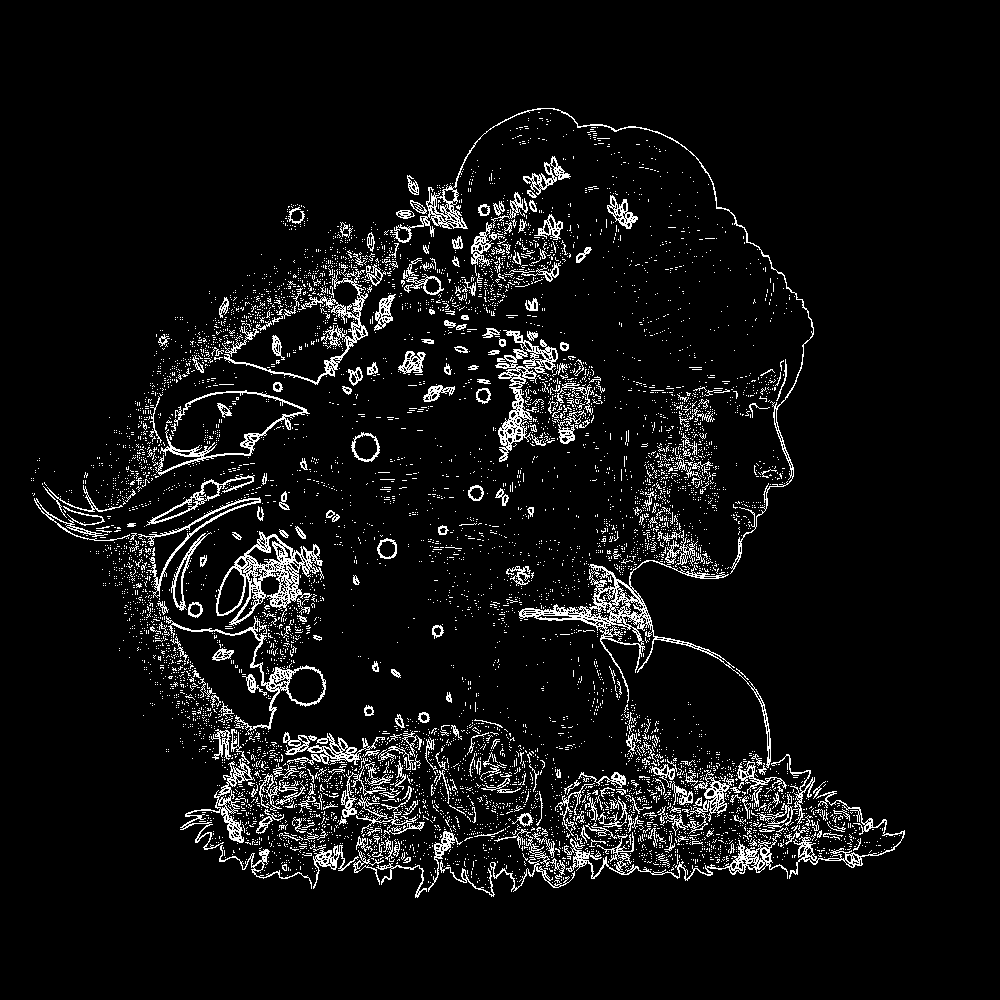

In [40]:
display(Image(filename=path))